# Aula 111

## Carregue os Dados

**Estrutura de diretórios do conjunto de dados de imagens**:

**Observação: Os nomes de diretórios e subdiretórios mostrados aqui são apenas para fins de explicação que podem diferir do código.**

Suponha que se tivermos um diretório mestre (pasta) das imagens, podemos subdividi-lo em subdiretórios (subpastas) de imagens de "Treinamento", "Validação" e "Teste" . 

E então o diretório "Treinamento" contêm subdiretórios (subpastas) chamados "Infectados" e "Não infectados" que contêm imagens apropriadas nos respectivos subdiretórios.

Da mesma forma, os diretórios “Validação” e “Teste” também contêm subdiretórios (subpastas) chamados “Infectados” e “Não infectados” que contêm imagens apropriadas nos respectivos subdiretórios.


**Treinamento**: As imagens neste diretório serão usadas para o treinamento dos dados.

**Validação**: As imagens neste diretório serão usadas para validar o treinamento do modelo. O conjunto de dados de validação nos permite ver quanto os dados conseguem generalizar a classificação.

**Teste**: As imagens neste diretório serão usadas para testar quanto o modelo foi treinado.
<img src="https://s3-whjr-curriculum-uploads.whjr.online/f5dae48f-95b0-427b-a513-e54506b16603.PNG" width= 600>



In [ ]:
!git clone https://github.com/ByjusBrazil/PRO_1-1_C111_PneumothoraxImageDataset

Cloning into 'PRO_1-1_C111_PneumothoraxImageDataset'...
remote: Enumerating objects: 614, done.
remote: Total 614 (delta 0), reused 0 (delta 0), pack-reused 614
Receiving objects: 100% (614/614), 231.38 MiB | 25.30 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (601/601), done.


## Visualize os Dados

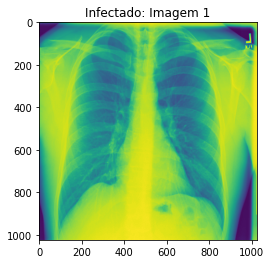

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

training_infected_image = "/content/PRO_1-1_C111_PneumothoraxImageDataset/training_dataset/infected/image_1.png"

# carregue os pixels das imagens
image = imread(training_infected_image)

pyplot.title("Infectado: Imagem 1")

# plote os dados brutos de pixel
pyplot.imshow(image)

# mostre a figura
pyplot.show()


## Pré-processamento de imagens

1. Converta cada imagem em um array
2. Mapeie cada imagem com uma etiqueta
3. Aumente cada imagem

### Pré-processamento de imagens: Mapeando cada imagem com uma etiqueta

<center><b>Mapeando cada imagem com uma etiqueta</b><br><img src="https://s3-whjr-curriculum-uploads.whjr.online/9a32594a-786e-4243-9959-f2fc565b0335.PNG" width= 1000>

### Pré-processamento de imagens: Aumento dos Dados

Algumas técnicas de aumento de imagens:

*   Rotação da imagem
*   Deslocamento de largura e de altura da imagem
*   Inversão horizontal e vertical da imagem
*   Redimensionamento da imagem
*   Zoom na imagem


<img src="https://s3-whjr-curriculum-uploads.whjr.online/196705c3-eb6c-4311-a5e2-485406dd0420.gif" width= 400>











### Rotações Aleatórias e Deslocamento de Largura

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rotações aleatórias e mudança de largura usando ImageDataGenerator 
training_data_generator = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.3,    
    fill_mode='nearest')


# Diretório de imagens
training_image_directory = "/content/PRO_1-1_C111_PneumothoraxImageDataset/training_dataset"

# Gere arquivos de imagem rotacionados aleatoriamente
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 200 images belonging to 2 classes.


## Visualize Imagens Pré-processadas


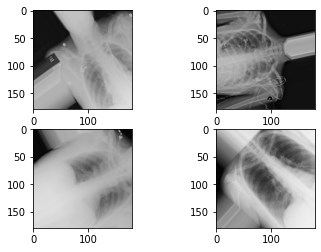

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

for i in range(4):

	# Defina uma subimagem
	pyplot.subplot(2, 2, i+1)
 
	# Gere lotes de imagens
	batch = training_augmented_images.next()
 
	# Converta em inteiros sem sinal para visualização
	image = batch[0][0].astype('uint8')
 
	# Plote os dados brutos de pixel
	pyplot.imshow(image)

# Plote a figura principal (com 4 subfiguras)
pyplot.show()


## Pré-processamento de imagens: Etiquetando imagens


In [ ]:
training_augmented_images.class_indices

{'infected': 0, 'uninfected': 1}

## Atividade Adicional

#### Aumento de dados aleatórios (Redimensionamento, Rotação, Inversões, Zoom, Deslocamentos) usando ImageDataGenerator

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Aumento aleatório de dados 
# (Redimensionamento, Rotação, Inversões, Zoom, Deslocamentos) 
# usando ImageDataGenerator 
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


# Diretório de Imagens
training_image_directory = "/content/PRO_1-1_C111_PneumothoraxImageDataset/training_dataset"

# Gere arquivos de imagem aumentada
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 200 images belonging to 2 classes.


# Aula 112

## Arquitetura de Rede Neural Convolucional
Um modelo CNN possui:

1. **Camadas de Aprendizado de Características**:

   1.1 Camadas de Convolução + Ativação(RELU)

   1.2 Camadas de Pooling

2. **Camadas de Classificação**:

   2.1 Camada Flatten

   2.2 Camada Totalmente Conectada (Densa)

   2.3 Camada Totalmente Conectada (Densa) com Softmax

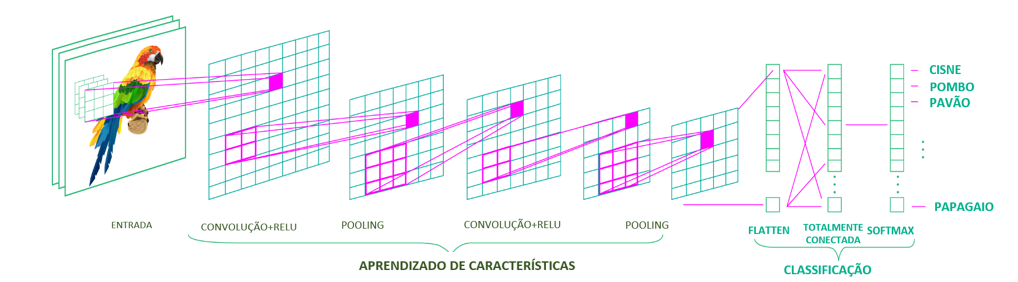



**Visualização de Extração de Características (Convolução + Relu)**

A convolução é uma computação matemática entre dois arrays, o array de imagens e o array de filtros que gera um novo array de imagens.


Visualmente, podemos entender que o detector/filtro de características se move sobre a imagem para extrair características da imagem.



[<img src="https://s3-whjr-curriculum-uploads.whjr.online/61589851-a36b-442a-b1fb-1d370de1c333.gif" width= 500>](https://)

## Matematicamente:

**Camada Conv2D**

A convolução é uma computação matemática entre dois arrays, o array de imagens e o array de filtros que gera um novo array de imagens.

Uma parte do array da imagem de entrada, chamado de subarray (tamanho igual ao tamanho do filtro) é obtido, começando no canto superior esquerdo.

Este subarray é multiplicado pelo array de filtros. Podemos multiplicar um array pelo outro multiplicando o primeiro elemento pelo primeiro elemento de ambos os arrays (o segundo elemento pelo segundo elemento de ambos os arrays e assim por diante).

Após a multiplicação, soma-se o resultado, que nos dá o valor do primeiro elemento do novo array de imagens.

Em seguida, deslocamos uma coluna para a direita, repetimos os passos acima para obter o valor do segundo elemento do novo array.

Quando a linha inteira estiver concluída, deslocamos uma linha para baixo, repetimos os passos acima para obter o valor de todos os elementos do novo array um por um.

Todo o processo é repetido com filtros diferentes, para obter resultados diferentes, que juntos são o resultado da primeira camada Conv2Dr.

Esses resultados da primeira camada Conv2D são fornecidos à segunda camada Conv2D e as convoluções são realizadasd.

Isso é repetido para todas as camadas do modelo CNN.


<img src="https://s3-whjr-curriculum-uploads.whjr.online/942434db-c43a-4799-b1dc-6250587ab29b.gif" width= 800>

**ReLU**

O ReLU é definido como uma função, y= f(x) em que ela retorna x para todos os valores de x > 0 e 0 para todos os valores de x<0.

<img src="https://s3-whjr-curriculum-uploads.whjr.online/44a57ec2-cae0-43cc-89d7-f0194d1af69a.PNG" width= 600>


**MaxPooling2D**

Primeiro, há um array de entrada (por exemplo, 4x4) e o tamanho do pool (por exemplo, 2x2). O tamanho do pool é sempre menor que o tamanho do array de entrada.

Em seguida, o valor máximo é obtido do subarray de tamanho igual ao tamanho do conjunto.

O resultado após a aplicação do Max Pooling será o novo array de tamanho igual à metade do tamanho do array de entrada originaly.

Como nosso array de entrada é 4x4, após o max pooling, o novo array será 2x2, reduzindo assim a dimensão do array.


<img src="https://s3-whjr-curriculum-uploads.whjr.online/42a965fe-7067-4f51-91c4-86433d4e3148.PNG" width= 800>


## Definir o Modelo de Rede Neural de Convolução (CNN)

In [ ]:
model = tf.keras.models.Sequential([
    
    # Primeira camada de Convolução e Pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Segunda camada de Convolução e Pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Terceira camada de Convolução e Pooling
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Quarta camada de Convolução e Pooling
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Achatar (flatten) os resultados para alimentar em uma camada densa
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Camada de classificação
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

## Model.Summary

In [ ]:
model.summary()

## Visualizar os resultados intermediárias das camadas convolucionais


O documento visual mostra como as características são extraídas camada após camada em **4** **camadas convolucionais** (conv2d, conv2d_1, conv2d_2, conv2d_3) com **camadas de max pooling**(max_pooling2d, max_pooling2d_1, max_pooling2d_2, max_pooling2d_3)

**Observação: Este documento visual foi criado apenas para fins de explicação.**

No início de uma rede convolucional, o filtro (detector de características/kernel) detecta padrões simples, como linhas horizontais, linhas verticais e cantos, formas simples.

Nas camadas posteriores da rede, os filtros (detector de características /kernel) são complexos que detectam formas, objetos e outras estruturas complexas, o que é feito usando a característica gerado anteriormente e suas características simples detectadas para construir outras mais complexas.


*Observação: À medida que nos aprofundamos nas camadas, a característica se torna cada vez mais complexa e, portanto, menos interpretável visualmente. Elas começam a codificar conceitos de nível superior, como bordas simples, cantos e ângulos. Apresentações mais altas carregam cada vez menos informações sobre o conteúdo visual da imagem e cada vez mais informações relacionadas à classe da imagem. Por isso, os resultados da camada Densa não serão mostrados na explicação visual.*



<img src="https://s3-whjr-curriculum-uploads.whjr.online/b941c8bd-c137-449f-ae8f-7233735a7845.jpg" width= 800>

# Aula 113

## Compilar o Modelo

Antes de treinar o modelo, precisamos compilá-lo. Nós compilamos o modelo usando o método compile() do Keras.

O método compile recebe muitos argumentos, mas passaremos os três argumentos que precisam ser especificados. Os argumentos são: 

1. Optimizers (otimizadores)

2. Função loss (perda)

3. Metrics (métricas) de previsão


<img src="https://s3-whjr-curriculum-uploads.whjr.online/97f80885-f95b-426f-afb6-d19d2199bd9f.PNG" width= 500>

**Necessidade de compilação do modelo:**

Quando o modelo é treinado, ele quase nunca poderá ser 100% eficiente, pois nem sempre ele consegue prever corretamente a classe da imagem.

Isso leva ao conceito de perda durante o treinamento do modelo, que nos mostra o desempenho ruim do modelo.

Portanto, precisamos usar as funções de perda (funções de computação matemática) para obter o valor da perda. 

Por exemplo, se o resultado da função de perda nos der o valor de 0.45, isso significa que 45% (0.45 X 100) das vezes, o modelo irá prever resultados errados e apenas 55% das vezes irá prever os resultados corretos!

Isso significa que devemos tentar minimizar o valor da função de perda, pois um valor de perda menor significa que nosso modelo terá um desempenho melhor. O processo de minimizar (ou maximizar) o valor de uma função/expressão matemática é chamado de otimização.

<br><img src="https://s3-whjr-curriculum-uploads.whjr.online/bc3f670a-03a9-4b29-95c8-75142dab7030.PNG" width= 400>

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Ajustar e Salvar o Modelo

In [ ]:
history = model.fit(training_augmented_images, epochs=20, validation_data = validation_augmented_images, verbose=True)

model.save("Pneumothorax.h5")

## Executando/Testando o Modelo
 #### Prever a classe de uma imagem não vista

In [ ]:
training_augmented_images.class_indices

In [ ]:
import os
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

import tensorflow
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import img_to_array

# Diretório de imagens de teste
testing_image_directory = '/content/PRO_1-1_C113_PneumothoraxImageDataset/testing_dataset/infected'

# Todos os arquivos de imagem no diretório
img_files = os.listdir(testing_image_directory)

i= 0

# Loop através de 9 arquivos de imagem
for file in img_files[51:60]:

  # caminho completo da imagem
  img_files_path = os.path.join(testing_image_directory, file)

  # carregar imagem
  img_1 = load_img(img_files_path,target_size=(180, 180))

  # converter imagem para um array
  img_2 = img_to_array(img_1)

  # incrementar a dimensão
  img_3 = np.expand_dims(img_2, axis=0)
  
  # prever a classe de uma imagem não vista
  prediction = model.predict(img_3)
  # print(prediction)

  predict_class = np.argmax(prediction, axis=1)
  # print(predict_class)

  # plotar a imagem usando subimagens
  pyplot.subplot(3, 3, i+1)
  pyplot.imshow(img_2.astype('uint8'))
  
  # Adicionar o rótulo da imagem com o valor previsto da classe 
  pyplot.title(predict_class[0])

  # Não mostrar eixos x e y com a imagem
  pyplot.axis('off')

  i=i+1

pyplot.show()

## Atividade Adicional

## Curva de Acuracidade

In [ ]:
from matplotlib import pyplot

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# print(acc)
# print(val_acc)

epochs = range(len(acc))

pyplot.plot(epochs, acc, 'r', label='Acuracidade do treinamento')
pyplot.plot(epochs, val_acc, 'b', label='Acuracidade da validação')

pyplot.title('Acuracidade do treinamento e da validação')

pyplot.legend()

pyplot.show()